# Tidy Data and Pandas

[**Pandas**](https://pandas.pydata.org/) is the most popular and widely used Python library for data wrangling and analysis. Developed just over 10 years ago in the financial services industry, pandas is now included in all major distributions of Python and has become a mainstay for doing data analysis in Python. 

**Tidy Data** is a small set a of core principles to streamline analysis and coding by organizing data into tables with a simple and standardized structure. Tidy Data is highly intuitive and well suited to Pandas.   Keeping data organized following "Tidy Data" principles means less time wrangling data, short and clear Python code for analysis, and more time to capture good data and gain insight..

The purpose of this notebook is to get you started using Pandas with Tidy Data. Pandas is a full featured library capable of handling complex applications. In the spirit of the 80/20 rule (i.e., [Pareto principle]()), the goal here is to introduce just enough of the pandas library to handle routine data analysis tasks.

Some useful references:

* [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [Tidy Data](https://vita.had.co.nz/papers/tidy-data.pdf) paper by Hadley Wickham.
* [Tidy Data](https://r4ds.had.co.nz/tidy-data.html?q=Tidy%20Data#non-tidy-data), Chapter 12 from R for Data Science.
* [13 Most Important Pandas Functions for Data Science](https://www.analyticsvidhya.com/blog/2021/05/pandas-functions-13-most-important/)

## Tidy Data

>The KonMari Method™ is not a quick fix for a messy room or a once-in-a-while approach to tidying. 
It’s a chance to reset your entire life – but only if you commit to following its principles. -- Marie Kondo

Data acquired in process applications generally consists of repeated observation of a set of process variables. The values are usually numbers, such as temperature or pressure, but can also be strings, integers, or categorical data indicating the status of equipment or alarms.

We assume data from repeated observations is arranged in tabular form in data files. Each distinct experiment, treatment, or unit of data is located in a separate file.

* Every column of a data file holds all data for a unique variable.
* Every row of a data file is an observation.
* Every cell contains a single value.

![](https://r4ds.had.co.nz/images/tidy-1.png)
Figure Source: Figure 12.1 from R for Data Science (Hadley Wickham & Garrett Grolemund)

These assumptions are the ["Tidy Data"](https://vita.had.co.nz/papers/tidy-data.pdf) principles popularized by Hadley Wickham, and closely related to concepts underlying relational databases. 
Tiny Data assigns meaning to the structure of the data ffile, which significantly streamlines subsequenct coding and analysis. [Hart, et al., provide excellent contrasting examples of tidy and messy data](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005097).

These notes assume data is stored in data files organized using "Tiny Data" principles. If your data isn't organized like this, the procedures described by [Wickham](https://vita.had.co.nz/papers/tidy-data.pdf) may help reorgnize your data for more efficient analysis.

## Reading Tidy Data

The first We proceed assuming data is organized by Tidy Data principles, each data set corresponding to an experiment or other clearly defined collection of observations.

### From .csv files

For files stored in `.csv` format, a pandas **DataFrame** object is created with the [`read_csv(data_file)`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). `data_file` is a string containing a url or the name of a local file. `read_csv()` function has many optional arguments, but for simple cases the path to the data file is often enough to do the job.

In [1]:
import pandas as pd

data_file = "https://raw.githubusercontent.com/jckantor/cbe30338-book/main/notebooks/data/tclab-data-example.csv"
df = pd.read_csv(data_file)
display(df)

,Time,T1,T2,Q1,Q2
0,0.00,21.543,20.898,50.0,0.0
1,1.00,21.543,20.898,50.0,0.0
2,2.01,21.543,20.898,50.0,0.0
3,3.01,21.543,20.931,50.0,0.0
4,4.00,21.543,20.931,50.0,0.0
...,...,...,...,...,...
796,796.00,58.281,37.656,50.0,0.0
797,797.01,58.120,37.656,50.0,0.0
798,798.01,58.378,37.560,50.0,0.0
799,799.00,58.281,37.624,50.0,0.0


### From Google Sheets

Google sheets are a convenient to collect and share data. There is a complete API and libraries to enable full, authenticated, read/write access to Google Sheets.

But if the data is not confidential and can be temporarilty published to the web for public access, then it takes just a few steps and one line of Python to read the data as pandas DataFrame.

The first step is publish the sheet to the web. In Google Sheets, select "File > Share > Publish to the Web".

![](figures/pandas-google-sheets-1.png)

In the dialog box, choose the "Link" tab. Locate the drop-down menus, then select the sheet to be published and "Comma-seperated values (.csv)" format. Click "Publish".

![](figures/pandas-google-sheets-2.png)

After confirming the choice to publish, a link url will appear.  This url can be treat as a link to a .csv file. Use `.read_csv()` to create a pandas dataframe.

![](figures/pandas-google-sheets-3.png)

Copy the url into the following cell to complete the operation.

In [2]:
sheet_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSNUCEFMaGZ-y18p-AnDoImEeenMLbRxXBABwFNeP8I3xiUejolPJx-kr4aUywD0szRel81Kftr8J0R/pub?gid=865146464&single=true&output=csv"
hx = pd.read_csv(sheet_url)
hx

,Flow Rate H,Flow Rate C,Trial #,Hot Flow (L/hr),Cold Flow (L/hr),Time,H Outlet,H Inlet,C Inlet,C Outlet
0,H,H,1,651,798,32:08.1,37.3,56.4,15.5,30.8
1,H,H,1,651,798,32:07.8,37.2,56.3,15.4,30.8
2,H,H,1,651,798,32:07.6,37.2,56.3,15.4,30.8
3,H,M,2,650,512,29:13.0,41.4,56.4,15.6,34.7
4,H,M,2,650,512,29:12.3,41.4,56.4,15.6,34.7
5,H,M,2,650,512,29:12.1,41.4,56.4,15.6,34.7
6,H,L,3,655,201,26:17.3,47.9,56.4,16.1,42.3
7,H,L,3,655,201,26:17.1,47.9,56.4,16.2,42.3
8,H,L,3,655,201,26:16.8,47.9,56.4,16.2,42.3
9,M,H,4,503,795,20:22.3,34.5,56.4,15.5,29.1


### From Python

Pandas dataframes can be created directly in Python. Here we demonstrate use of a Python dictionary to create a dataframe with data for variables computed as numpy arrays.

In [3]:
import numpy as np

t = np.linspace(0, 10, 201)
s = np.sin(t)
c = np.cos(t)

df_np = pd.DataFrame({"time": t, "sin": s, "cos": c})
df_np

,time,sin,cos
0,0.00,0.000000,1.000000
1,0.05,0.049979,0.998750
2,0.10,0.099833,0.995004
3,0.15,0.149438,0.988771
4,0.20,0.198669,0.980067
...,...,...,...
196,9.80,-0.366479,-0.930426
197,9.85,-0.412523,-0.910947
198,9.90,-0.457536,-0.889191
199,9.95,-0.501405,-0.865213


## Accessing Data

The core object in pandas is the **DataFrame**. For "Tidy Data", a DataFrame will be collection of columns, each column containing observations of a single, unique variable. Each row is one observation of all variables. 

The **index** assigns a unique label to each row/observation.

In [4]:
df.index

RangeIndex(start=0, stop=801, step=1)

The names of the **columns** are given by `.columns`.

In [5]:
df.columns

Index(['Time', 'T1', 'T2', 'Q1', 'Q2'], dtype='object')

Each column forms a ``Series`` comprised of all observations of a variable. There are several common ways to access the data series for a variable. These produce the same result. 

* `df["T1"]` 
* `df.T1`
* `df.loc[:, "T1"]`

Which you choose depends on situation and context.

In [6]:
df["T1"]

0      21.543
1      21.543
2      21.543
3      21.543
4      21.543
        ...  
796    58.281
797    58.120
798    58.378
799    58.281
800    58.668
Name: T1, Length: 801, dtype: float64

The `.loc[row, column]` is used to extract slices of the dataframe. A single value is accessed by row index and column label.

In [7]:
df.loc[3, "T1"]

21.543

To extract values for multiple variables from a single observation.

In [8]:
df.loc[3, ["T1", "T2"]]

T1    21.543
T2    20.931
Name: 3, dtype: float64

To extract a range of observations of one or more variables.

In [9]:
df.loc[3:5, ["T1", "T2"]]

,T1,T2
3,21.543,20.931
4,21.543,20.931
5,21.543,20.931


Observations can be selected by conditions.

In [10]:
df[(df.Time >= 100) & (df.Time <= 110)]

,Time,T1,T2,Q1,Q2
100,100.01,36.367,22.929,50.0,0.0
101,101.00,36.399,23.090,50.0,0.0
102,102.01,36.689,23.154,50.0,0.0
103,103.01,36.689,23.154,50.0,0.0
104,104.01,37.012,23.187,50.0,0.0
105,105.01,37.012,23.154,50.0,0.0
106,106.00,37.173,23.154,50.0,0.0
107,107.00,37.334,23.187,50.0,0.0
108,108.00,37.398,23.380,50.0,0.0
109,109.01,37.656,23.412,50.0,0.0


## Visualizing Data

Pandas provides convenient tools for displaying data in tabular and graphical formats.

### Tabular Display

The quickest way to display a dataframe as a table is with `display()`. Additional styling and formating options are available through a dataframe's `.style` property.

In [11]:
display(df)

,Time,T1,T2,Q1,Q2
0,0.00,21.543,20.898,50.0,0.0
1,1.00,21.543,20.898,50.0,0.0
2,2.01,21.543,20.898,50.0,0.0
3,3.01,21.543,20.931,50.0,0.0
4,4.00,21.543,20.931,50.0,0.0
...,...,...,...,...,...
796,796.00,58.281,37.656,50.0,0.0
797,797.01,58.120,37.656,50.0,0.0
798,798.01,58.378,37.560,50.0,0.0
799,799.00,58.281,37.624,50.0,0.0


For development it is often enough to view just the first few rows or last few rows of a dataframe. The dataframe methods `.head()` and `.tail()` provide this service.

In [12]:
df.head(5)

,Time,T1,T2,Q1,Q2
0,0.00,21.543,20.898,50.0,0.0
1,1.00,21.543,20.898,50.0,0.0
2,2.01,21.543,20.898,50.0,0.0
3,3.01,21.543,20.931,50.0,0.0
4,4.00,21.543,20.931,50.0,0.0


In [13]:
df.tail(5)

,Time,T1,T2,Q1,Q2
796,796.00,58.281,37.656,50.0,0.0
797,797.01,58.120,37.656,50.0,0.0
798,798.01,58.378,37.560,50.0,0.0
799,799.00,58.281,37.624,50.0,0.0
800,800.01,58.668,37.592,50.0,0.0


### Plotting

An extensive variety of plots can be constructed using a dataframe's `.plot()` method. Many of the usual Matploblib plotting commands can be accessed through options passed to `.plot()`. For many routine applications, a single call of a dataframe's `.plot()` method can replace many lines of Python code using Matplotlib.

For example, to plot all observations for a single variable.

<AxesSubplot:>

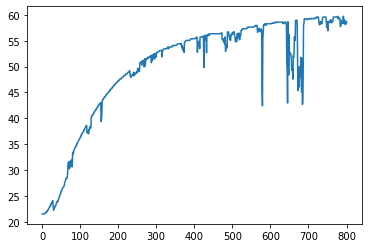

In [14]:
df.T1.plot()

The `.plot()` method will often be used to plot one or more variables on the vertical 'y' axis as a function of another variable on the horizontal 'x' axes. Additional options specify line styles, grid, labels, titles, and much more. 

<AxesSubplot:title={'center':'TC Lab'}, xlabel='Time', ylabel='deg C'>

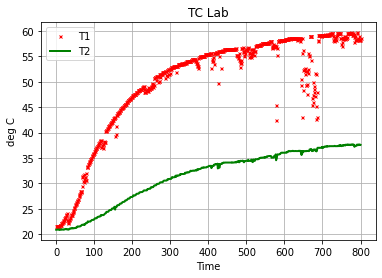

In [15]:
df.plot("Time", ["T1", "T2"], style={"T1":'rx', "T2":'g'}, lw=2, ms=3, 
        ylabel="deg C", title="TC Lab", grid=True)

array([[<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>]],
      dtype=object)

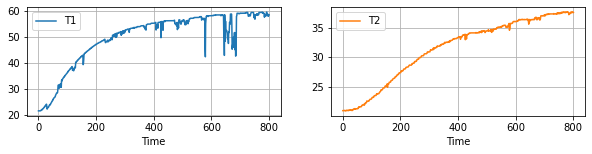

In [16]:
df.plot(x = "Time", y=["T1", "T2"], subplots=True, figsize=(10, 2), grid=True, layout=(1, 2))

<AxesSubplot:xlabel='Time'>

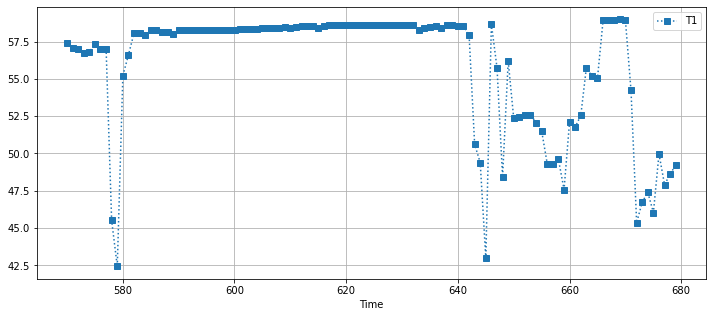

In [17]:
df[(df.Time > 570) & (df.Time < 680)].plot(x="Time", y="T1", figsize=(12, 5), style={"T1":"s:"}, grid=True)

### Scatter Plots

<AxesSubplot:xlabel='T1', ylabel='T2'>

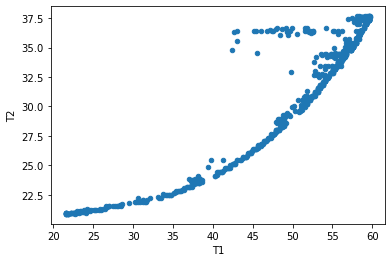

In [18]:
df.plot.scatter(x = "T1", y = "T2")

### Statistical Plots

array([[<AxesSubplot:title={'center':'T1'}>,
        <AxesSubplot:title={'center':'T2'}>]], dtype=object)

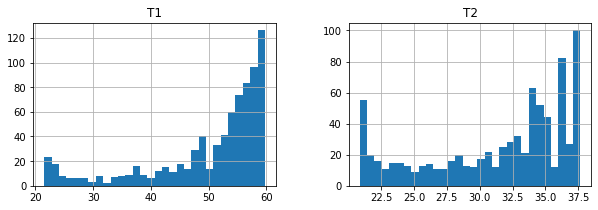

In [19]:
df[["T1", "T2"]].hist(bins=30, figsize=(10, 3))

## Case Study: Analysis of a Double Pipe Heat Exchanger

A stalwart of undergraduate chemical engineering laboratories is study of a double-pipe heat exchanger in counter-current flow. In this case, a student group collected multiple measurements of flow and temperature data from a heat exchanger with sensors configured as shown in the following diagram. (Note: The diagram shows co-current flow. The data was collected with the valves configured for counter-current flow of the hot stream.)

![](https://www.gunt.de/images/datasheet/1495/WL-315C-Comparison-of-various-heat-exchangers-gunt-1495-zeichnung_einzelheit_2.jpg)
Source: [Gunt WL315C Product Description](https://www.gunt.de/en/products/comparison-of-various-heat-exchangers/060.315C0/wl315c/glct-1:pa-148:pr-1495)

### Tidy Data

The student group designed a series of experiments measuring the performance of the heat exchanger to high (H), medium (M), and low (L) flowrates for both the hot and cold streams --- a total of nine flowrate combinations. For each combination they reported data for three repeated observations. [A portion of their data is available on Google Sheets](https://docs.google.com/spreadsheets/d/1wuJq3B4z0tmTIsRpm5zZUP-PBBxT6OpuJKeBlQcQ4Z0/edit?usp=sharing). From this data they intend to compute the overall heat transfer coefficient $UA$, and attempt to fit a regression model for the heat transfer coefficients as a function of the flowrates.

A screenshot of the data collected by the students is given below.

![](figures/pandas-google-sheets-4.png)

:::{admonition} Study Question

Before reading further, can you find three ways this data set is not consistent with Tidy Data?

:::{toggle}

* Empty rows are included for formatting that do not contain observations.
* Missing observations for trial 9.
* The use of vertical merging to indicate values by position rather than by actual content.
* The "Flow Rate (H/C)" includes two values in each cell.
* Information in the first column is meta-data, not a useful value to include in the observations.

:::
:::

### Reading Data

The raw data was copied to a new sheet in the same Google Sheets file, edited to conform with Tidy Data, and a link created using the procedures outlined above for reading data from Google Sheets. The data is read in the following cell.

In [20]:
hx = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSNUCEFMaGZ-y18p-AnDoImEeenMLbRxXBABwFNeP8I3xiUejolPJx-kr4aUywD0szRel81Kftr8J0R/pub?gid=865146464&single=true&output=csv")
hx.head()


,Flow Rate H,Flow Rate C,Trial #,Hot Flow (L/hr),Cold Flow (L/hr),Time,H Outlet,H Inlet,C Inlet,C Outlet
0,H,H,1,651,798,32:08.1,37.3,56.4,15.5,30.8
1,H,H,1,651,798,32:07.8,37.2,56.3,15.4,30.8
2,H,H,1,651,798,32:07.6,37.2,56.3,15.4,30.8
3,H,M,2,650,512,29:13.0,41.4,56.4,15.6,34.7
4,H,M,2,650,512,29:12.3,41.4,56.4,15.6,34.7


### Energy Balances

The first step in this analysis is to verify the energy balance. 

$$
\begin{align*}
Q_h & = \dot{q}_h \rho C_p (T_{h,in} - T_{h,out}) \\
Q_c & = \dot{q}_c \rho C_p (T_{c,out} - T_{c, in})
\end{align*}
$$

The next cell creates two new calculated variables in the dataframe for $Q_h$ and $Q_c$, and uses the pandas plotting facility to visualize the results. This calculation takes advantage of the "one variable per column" rule of Tidy Data which enables calculations for all observations to be done in a single line of code.

,Qh,Qc,Loss (%)
0,14.44,14.18,1.81
1,14.44,14.27,1.17
2,14.44,14.27,1.17
3,11.32,11.35,-0.30
4,11.32,11.35,-0.30
5,11.32,11.35,-0.30
6,6.46,6.11,5.41
7,6.46,6.09,5.77
8,6.46,6.09,5.77
9,12.79,12.55,1.85


<AxesSubplot:xlabel='Observation', ylabel='kW'>

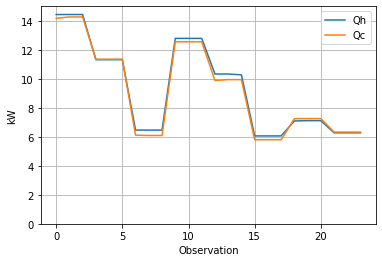

In [21]:
# heat capacity of water 
rho = 1.00                # kg / liter
Cp = 4.18                 # kJ/ kg / deg C

# heat balances
hx["Qh"] = rho * Cp * hx["Hot Flow (L/hr)"] * (hx["H Inlet"] - hx["H Outlet"]) / 3600
hx["Qc"] = rho * Cp * hx["Cold Flow (L/hr)"] * (hx["C Outlet"] - hx["C Inlet"]) / 3600
hx["Loss (%)"] = 100 * (1 - hx["Qc"]/hx["Qh"])

# plot
display(hx[["Qh", "Qc", "Loss (%)"]].style.format(precision=2))
hx.plot(y = ["Qh", "Qc"], ylim = (0, 15), grid=True, xlabel="Observation", ylabel="kW")

### Overall Heat Transfer Coefficient $UA$

The performance of a counter-current heat exchanger is given the relationship

$$Q = U A \Delta T_{lm} $$

where $\Delta T_{lm}$ is the log-mean temperature given by

$$
\begin{align*}
\Delta T_0 & = T_{h, out} - T_{c, in} \\
\Delta T_1 & = T_{h, in} - T_{c, out} \\
\\
\Delta T_{lm} & = \frac{\Delta T_1 - \Delta T_0}{\ln\frac{\Delta T_1}{\Delta T_0}}
\end{align*}
$$

<AxesSubplot:xlabel='Observation', ylabel='kW/deg C'>

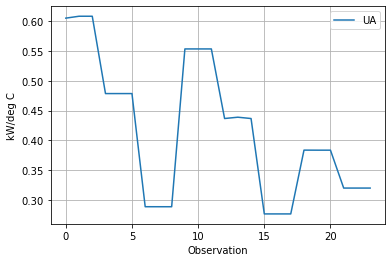

In [31]:
dT0 = hx["H Outlet"] - hx["C Inlet"]
dT1 = hx["H Inlet"] - hx["C Outlet"]
hx["LMTD"] = (dT1 - dT0) / np.log(dT1/dT0)

Q = (hx.Qh + hx.Qc)/2
hx["UA"] =  Q/hx.LMTD

hx.plot(y="UA", xlabel="Observation", ylabel="kW/deg C", grid=True)

### How does $UA$ depend on flowrates?

The data clearly demonstrate that the heat transfer coefficient in the double pipe heat exchanger depends on flowrates of both the cold and hot liquid streams. We can see this by inspecting the data.

In [23]:
hx[["Flow Rate H", "Flow Rate C", "Hot Flow (L/hr)", "Cold Flow (L/hr)", "UA"]]

,Flow Rate H,Flow Rate C,Hot Flow (L/hr),Cold Flow (L/hr),UA
0,H,H,651,798,0.604966
1,H,H,651,798,0.608145
2,H,H,651,798,0.608145
3,H,M,650,512,0.478571
4,H,M,650,512,0.478571
5,H,M,650,512,0.478571
6,H,L,655,201,0.288997
7,H,L,655,201,0.288976
8,H,L,655,201,0.288976
9,M,H,503,795,0.553374


The replicated measurements provide an opportunity to compute averages. Here we use the pandas `.groupby()` function to group observations and compute means. The data will be used to plot results, so we'll save the results of these calculations as a new dataframe for reuse.

In [24]:
sx = hx.groupby(["Flow Rate H", "Flow Rate C"]).mean()[["Hot Flow (L/hr)", "Cold Flow (L/hr)", "UA"]]
sx

Hot Flow (L/hr)  Cold Flow (L/hr)        UA
Flow Rate H Flow Rate C                                             
H           H                      651.0             798.0  0.607085
            L                      655.0             201.0  0.288983
            M                      650.0             512.0  0.478571
L           H                      205.0             801.0  0.383771
            M                      204.0             500.0  0.320247
M           H                      503.0             795.0  0.553374
            L                      502.0             199.0  0.276936
            M                      500.0             498.0  0.437509

Flow Rate H
H    AxesSubplot(0.125,0.125;0.775x0.755)
L    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

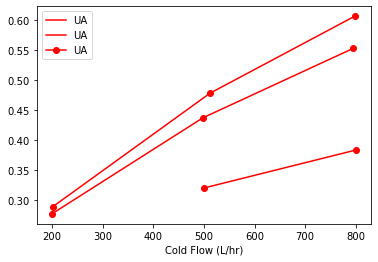

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
sx.sort_values("Cold Flow (L/hr)").groupby("Flow Rate H").plot(x = "Cold Flow (L/hr)", y = "UA", 
                                                               style={"UA": 'ro-'}, ax=ax)

Flow Rate C
H    AxesSubplot(0.125,0.125;0.775x0.755)
L    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

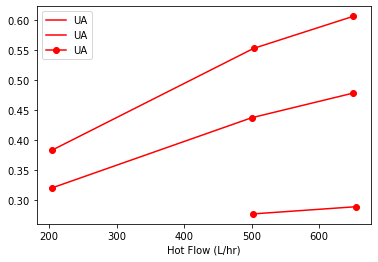

In [26]:
fig, ax = plt.subplots(1, 1)
sx.sort_values("Hot Flow (L/hr)").groupby("Flow Rate C").plot(x = "Hot Flow (L/hr)", y = "UA", 
                                                               style={"UA": 'ro-'}, ax=ax)

### Fitting a Model for $UA$

For a series of transport mechanisms, the overall heat transfer coefficient 

$$\frac{1}{UA} = \frac{1}{U_hA} + \frac{1}{U_{tubeA}} + \frac{1}{U_cA}$$

$U_{tube}A$ is a constant for this experiment. $U_h$A and $U_c$A varying with flowrate and proporitonal to dimensionless Nusselt number.  The hot and cold liquid flows in the double pipe heat exchanger are well within the range for fully developed turbulent flow. Under these conditions for flows inside closed tubes, the Dittus-Boelter equation provides an explicit expression for Nusselt number

$$Nu = C \cdot Re ^{4/5} Pr ^ n$$

where $C$ is a constant, $Re$ is the Reynold's number that is proportional to flowrate, and $Pr$ is the Prandtl number determined by fluid properties.

Experimentally, consider a set of values for $UA$ determined by varying $\dot{m}_h$ and $\dot{m}_c$ over range of values. Because Reynold's number is proportional to flowrate, we can propose a model

$$\frac{1}{UA} = R =  R_{t} + r_h \dot{q}_h^{-0.8} + r_c \dot{q}_h^{-0.8}$$

This suggests a linear regression for $R = \frac{1}{UA}$ in terms of $X_h = \dot{q}_h^{-0.8}$ and $X_c  = \dot{q}_c^{-0.8}$.


In [27]:
hx["R"] = 1.0/hx["UA"]
hx["Xh"] = hx["Hot Flow (L/hr)"]**(-0.8)
hx["Xc"] = hx["Cold Flow (L/hr)"]**(-0.8)

In [28]:
import statsmodels.formula.api as sm

result = sm.ols(formula="R ~ Xh + Xc", data = hx).fit()
print(result.params)
print(result.summary())

Intercept      0.141716
Xh           115.292199
Xc           186.346764
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3711.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           1.70e-27
Time:                        08:53:59   Log-Likelihood:                 44.929
No. Observations:                  24   AIC:                            -83.86
Df Residuals:                      21   BIC:                            -80.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [29]:
hx["Rh"] = 115.3 * hx["Xh"]
hx["Rc"] = 186.3 * hx["Xc"]
hx["Rt"] = 0.142

hx["R_pred"] = hx["Rt"] + hx["Rh"] + hx["Rc"]
hx[["R", "R_pred", "Rt", "Rh", "Rc"]]

,R,R_pred,Rt,Rh,Rc
0,1.652986,1.677494,0.142,0.647090,0.888404
1,1.644344,1.677494,0.142,0.647090,0.888404
2,1.644344,1.677494,0.142,0.647090,0.888404
3,2.089553,2.056945,0.142,0.647886,1.267059
4,2.089553,2.056945,0.142,0.647886,1.267059
5,2.089553,2.056945,0.142,0.647886,1.267059
6,3.460242,3.462974,0.142,0.643926,2.677047
7,3.460489,3.462974,0.142,0.643926,2.677047
8,3.460489,3.462974,0.142,0.643926,2.677047
9,1.807095,1.828466,0.142,0.795380,0.891085


### Comparison of Model to Experimental Data

<AxesSubplot:title={'center':'Heat Transfer Coefficient'}>

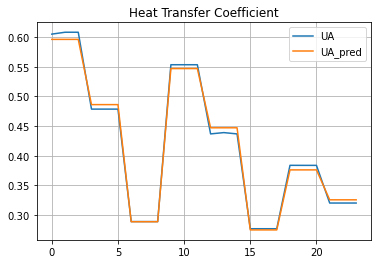

In [30]:
hx["UA_pred"] = 1/hx["R_pred"]
hx.plot(y = ["UA", "UA_pred"], grid=True, title="Heat Transfer Coefficient")

## Concluding Remarks

Learning Pandas and data analysis is like learning to ride a bicycle. Once you have the enough knowledge to get going, the next steps are about practice and learning by doing. 

This notobook provides basic knowledge to the use of pandas for data analysis for engineering applications. With Tidy Data principles, data analysis can be streamlined and intuitive. The next steps are to put these tools work on your data analaysis tasks, and explore other elements of the pandas library that can be useful in your work.